In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mcu
import swiss_roll_dataset_generator as roll_gen
import dataset_generator


/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


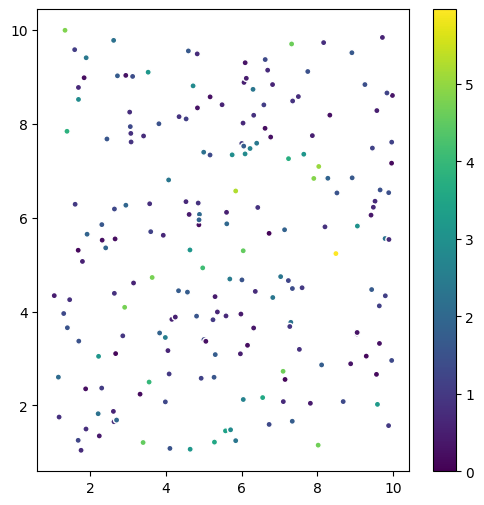

0.1426801493748149


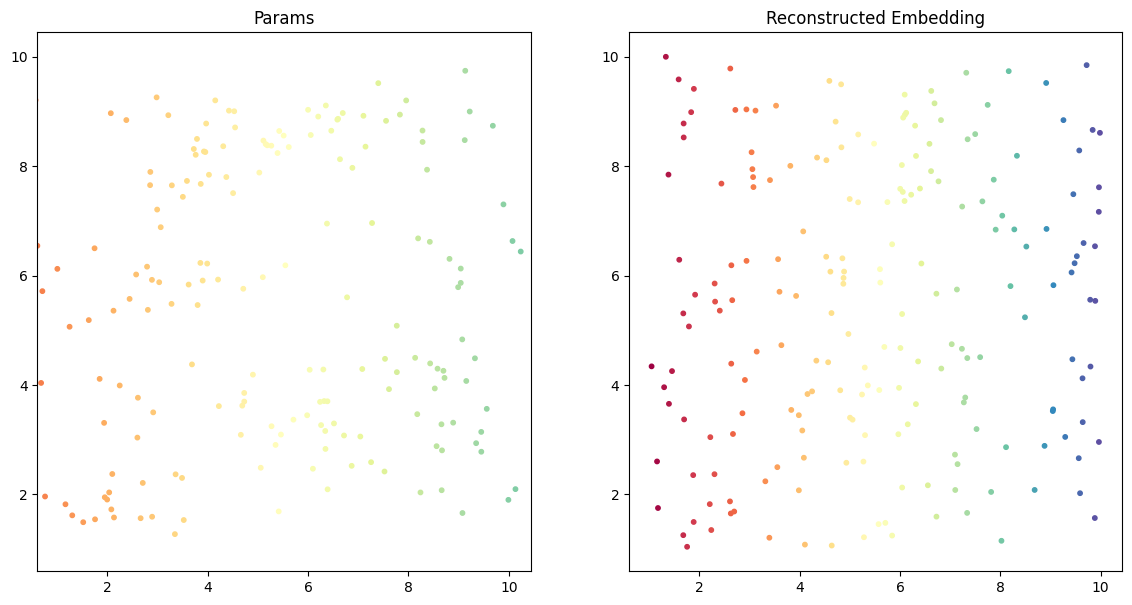

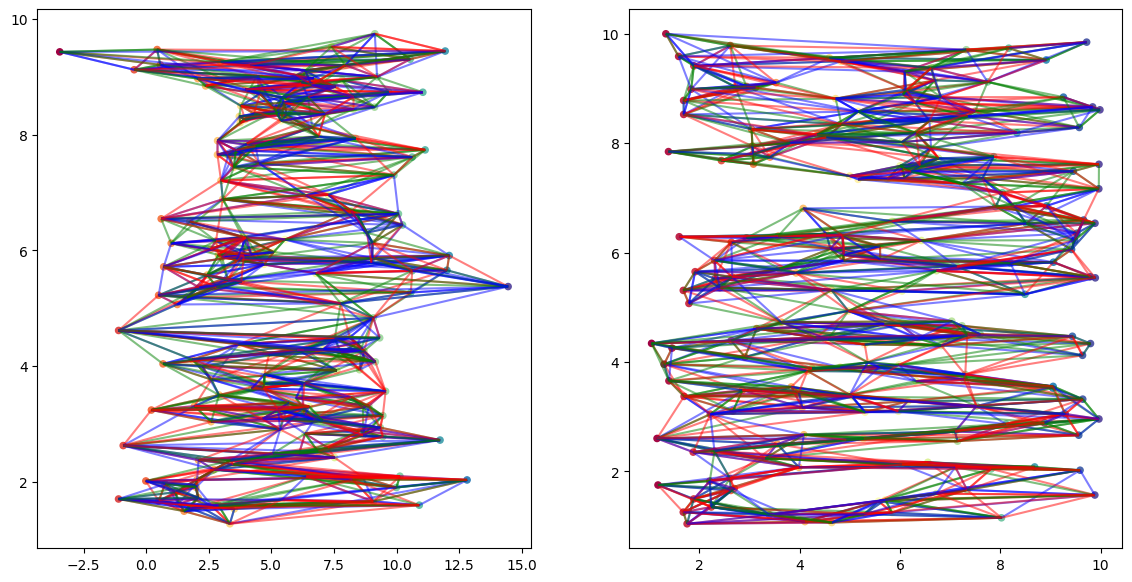

In [3]:
figure_num = 200
figure_point_cnt = 1600
deterministic_param_scatter = False
p = 2
noise_level=0
lw = [1, 1]
up = [10, 10]
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
# control_vars = np.array([[1, 1], [1, 1],[1, 1], [1, 1], [1, 1],[1, 1], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]])
rolls = roll_gen.generate_array_of_swiss_rolls(control_vars, noise_level=noise_level, min_num_points=figure_point_cnt)
k = 6
c = 1e5
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, rolls, k)

q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges, c)

ld_embedding = mcu.reduce_dimensions(q, 2)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

ld_embedding_to_params = np.dot(ld_embedding, np.linalg.inv(regression_matrix)) * x_stds + x_means
reconstructed_y_to_params = standardized_x * x_stds + x_means

rre = mcu.compute_rre(ld_embedding_to_params, reconstructed_y_to_params)
mcu.plot_rre_heatmap(np.linalg.norm(ld_embedding_to_params - reconstructed_y_to_params, axis=1),
                     reconstructed_y_to_params)
print(np.median(rre))
mcu.plot_embeddings_vs_parameters(ld_embedding_to_params, reconstructed_y_to_params)
mcu.plot_graph(edges, ld_embedding_to_params, reconstructed_y_to_params)

In [ ]:
pieces_cnt = 12
test_data_size = 50
noise_level = 0
interval_runs = mcu.test_predictive_optimization(lw, up, p, k, roll_gen.generate_array_of_swiss_rolls, figure_point_cnt,
                                                 centered_y, ld_embedding, regression_matrix, y_means, y_scaler,
                                                 x_stds, x_means, noise_level, pieces_cnt, test_data_size,
                                                 same_value = False)
mcu.plot_predictive_optimization_heatmaps(lw, up, pieces_cnt, interval_runs)

-----------
x_opt  = [2.20530982 2.13914934], x_err = 131.22893554627802
x_real = [1.61503621 1.67621511]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 781.1876149347509
x_real = [1.32332628 1.37998739]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 1079.87925218082
x_real = [1.60139988 1.3771318 ]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 1143.5759254157451
x_real = [1.07922054 1.00848991]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 1248.405016187289
x_real = [1.03240193 1.10837379]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 210.5118050750071
x_real = [1.14286076 1.74577387]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 518.500038483304
x_real = [1.17613267 1.48381094]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 1284.2438687828671
x_real = [1.73232238 1.24627685]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 122.76517324065277
x_real = [1.74779126 1.7055503 ]
-----------
x_opt  = [2.20530982 2.13914934], x_err =

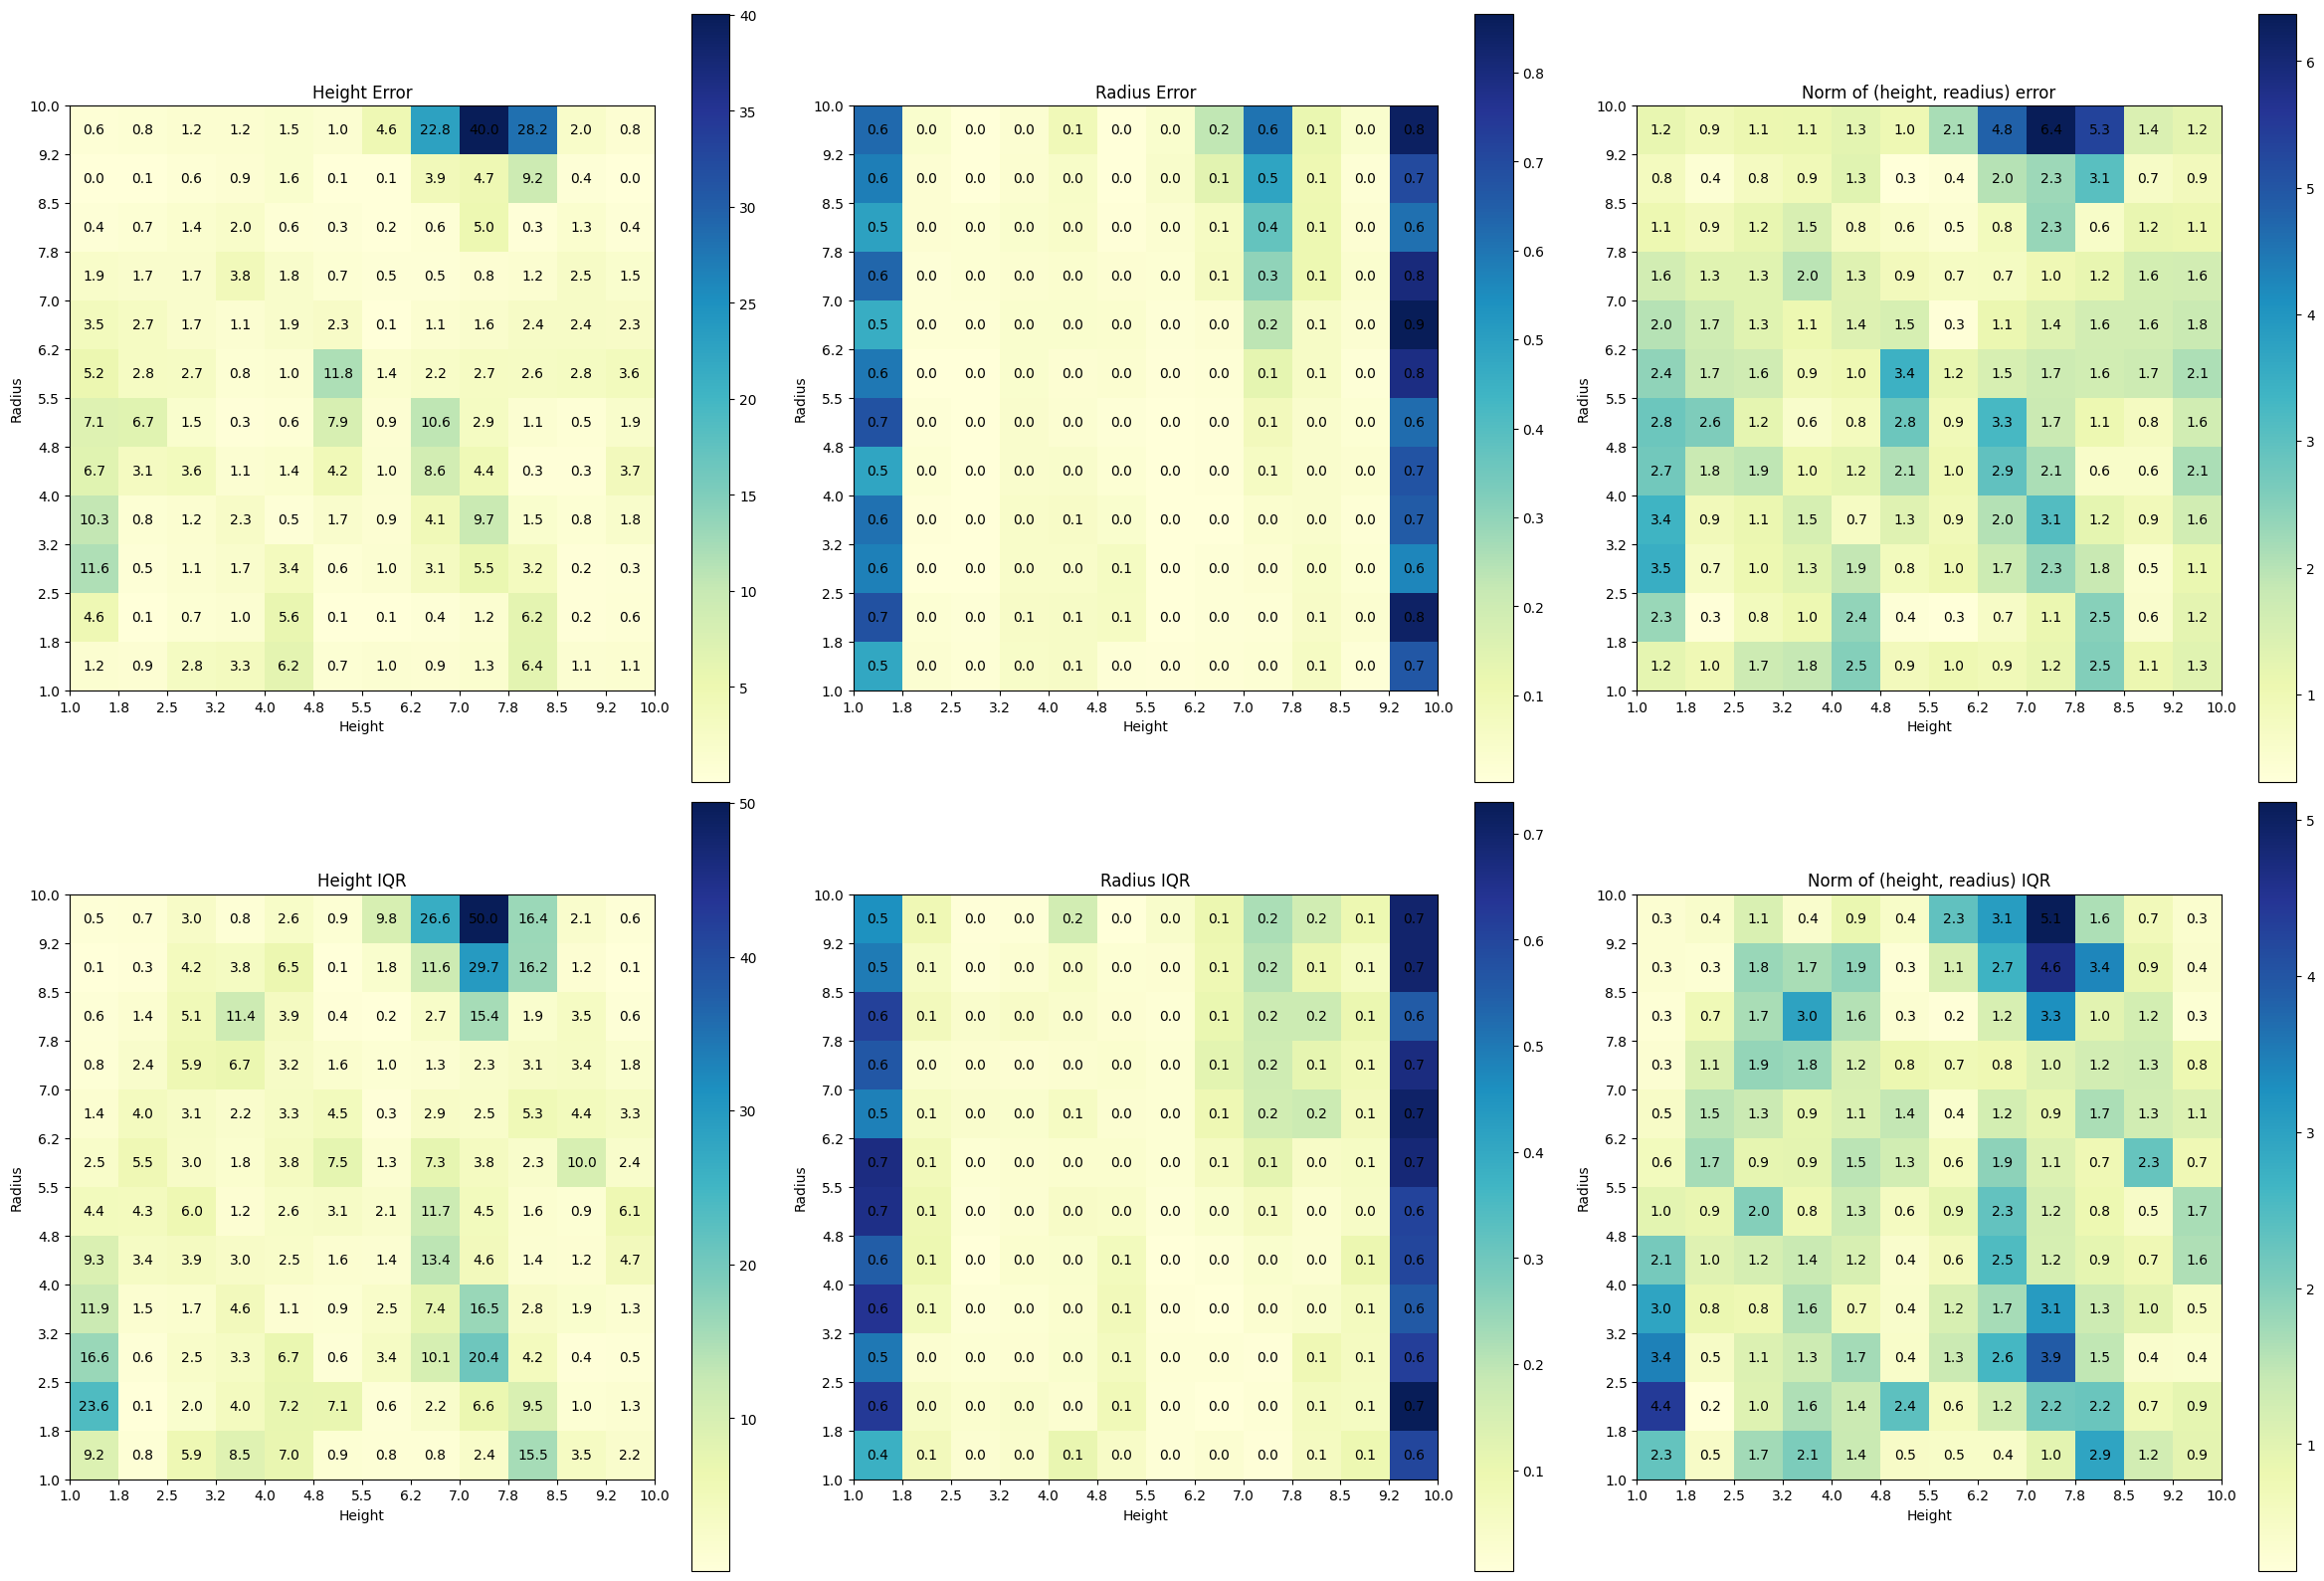

In [10]:
pieces_cnt = 12
test_data_size = 50
noise_level = 0
interval_runs = mcu.test_predictive_optimization(lw, up, p, k, roll_gen.generate_array_of_swiss_rolls, figure_point_cnt,
                                                 centered_y, ld_embedding, regression_matrix, y_means, y_scaler,
                                                 x_stds, x_means, noise_level, pieces_cnt, test_data_size,
                                                 same_value = True)
mcu.plot_predictive_optimization_heatmaps(lw, up, pieces_cnt, interval_runs)

-----------
x_opt  = [2.20530982 2.13914934], x_err = 147.77057638765376
x_real = [1.75 1.75]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 147.77057638765376
x_real = [1.75 1.75]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 147.77057638765376
x_real = [1.75 1.75]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 147.77057638765376
x_real = [1.75 1.75]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 147.77057638765376
x_real = [1.75 1.75]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 147.77057638765376
x_real = [1.75 1.75]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 147.77057638765376
x_real = [1.75 1.75]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 147.77057638765376
x_real = [1.75 1.75]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 147.77057638765376
x_real = [1.75 1.75]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 147.77057638765376
x_real = [1.75 1.75]
-----------
x_opt  = [2.20530982 2.13914934], x_err = 147.77

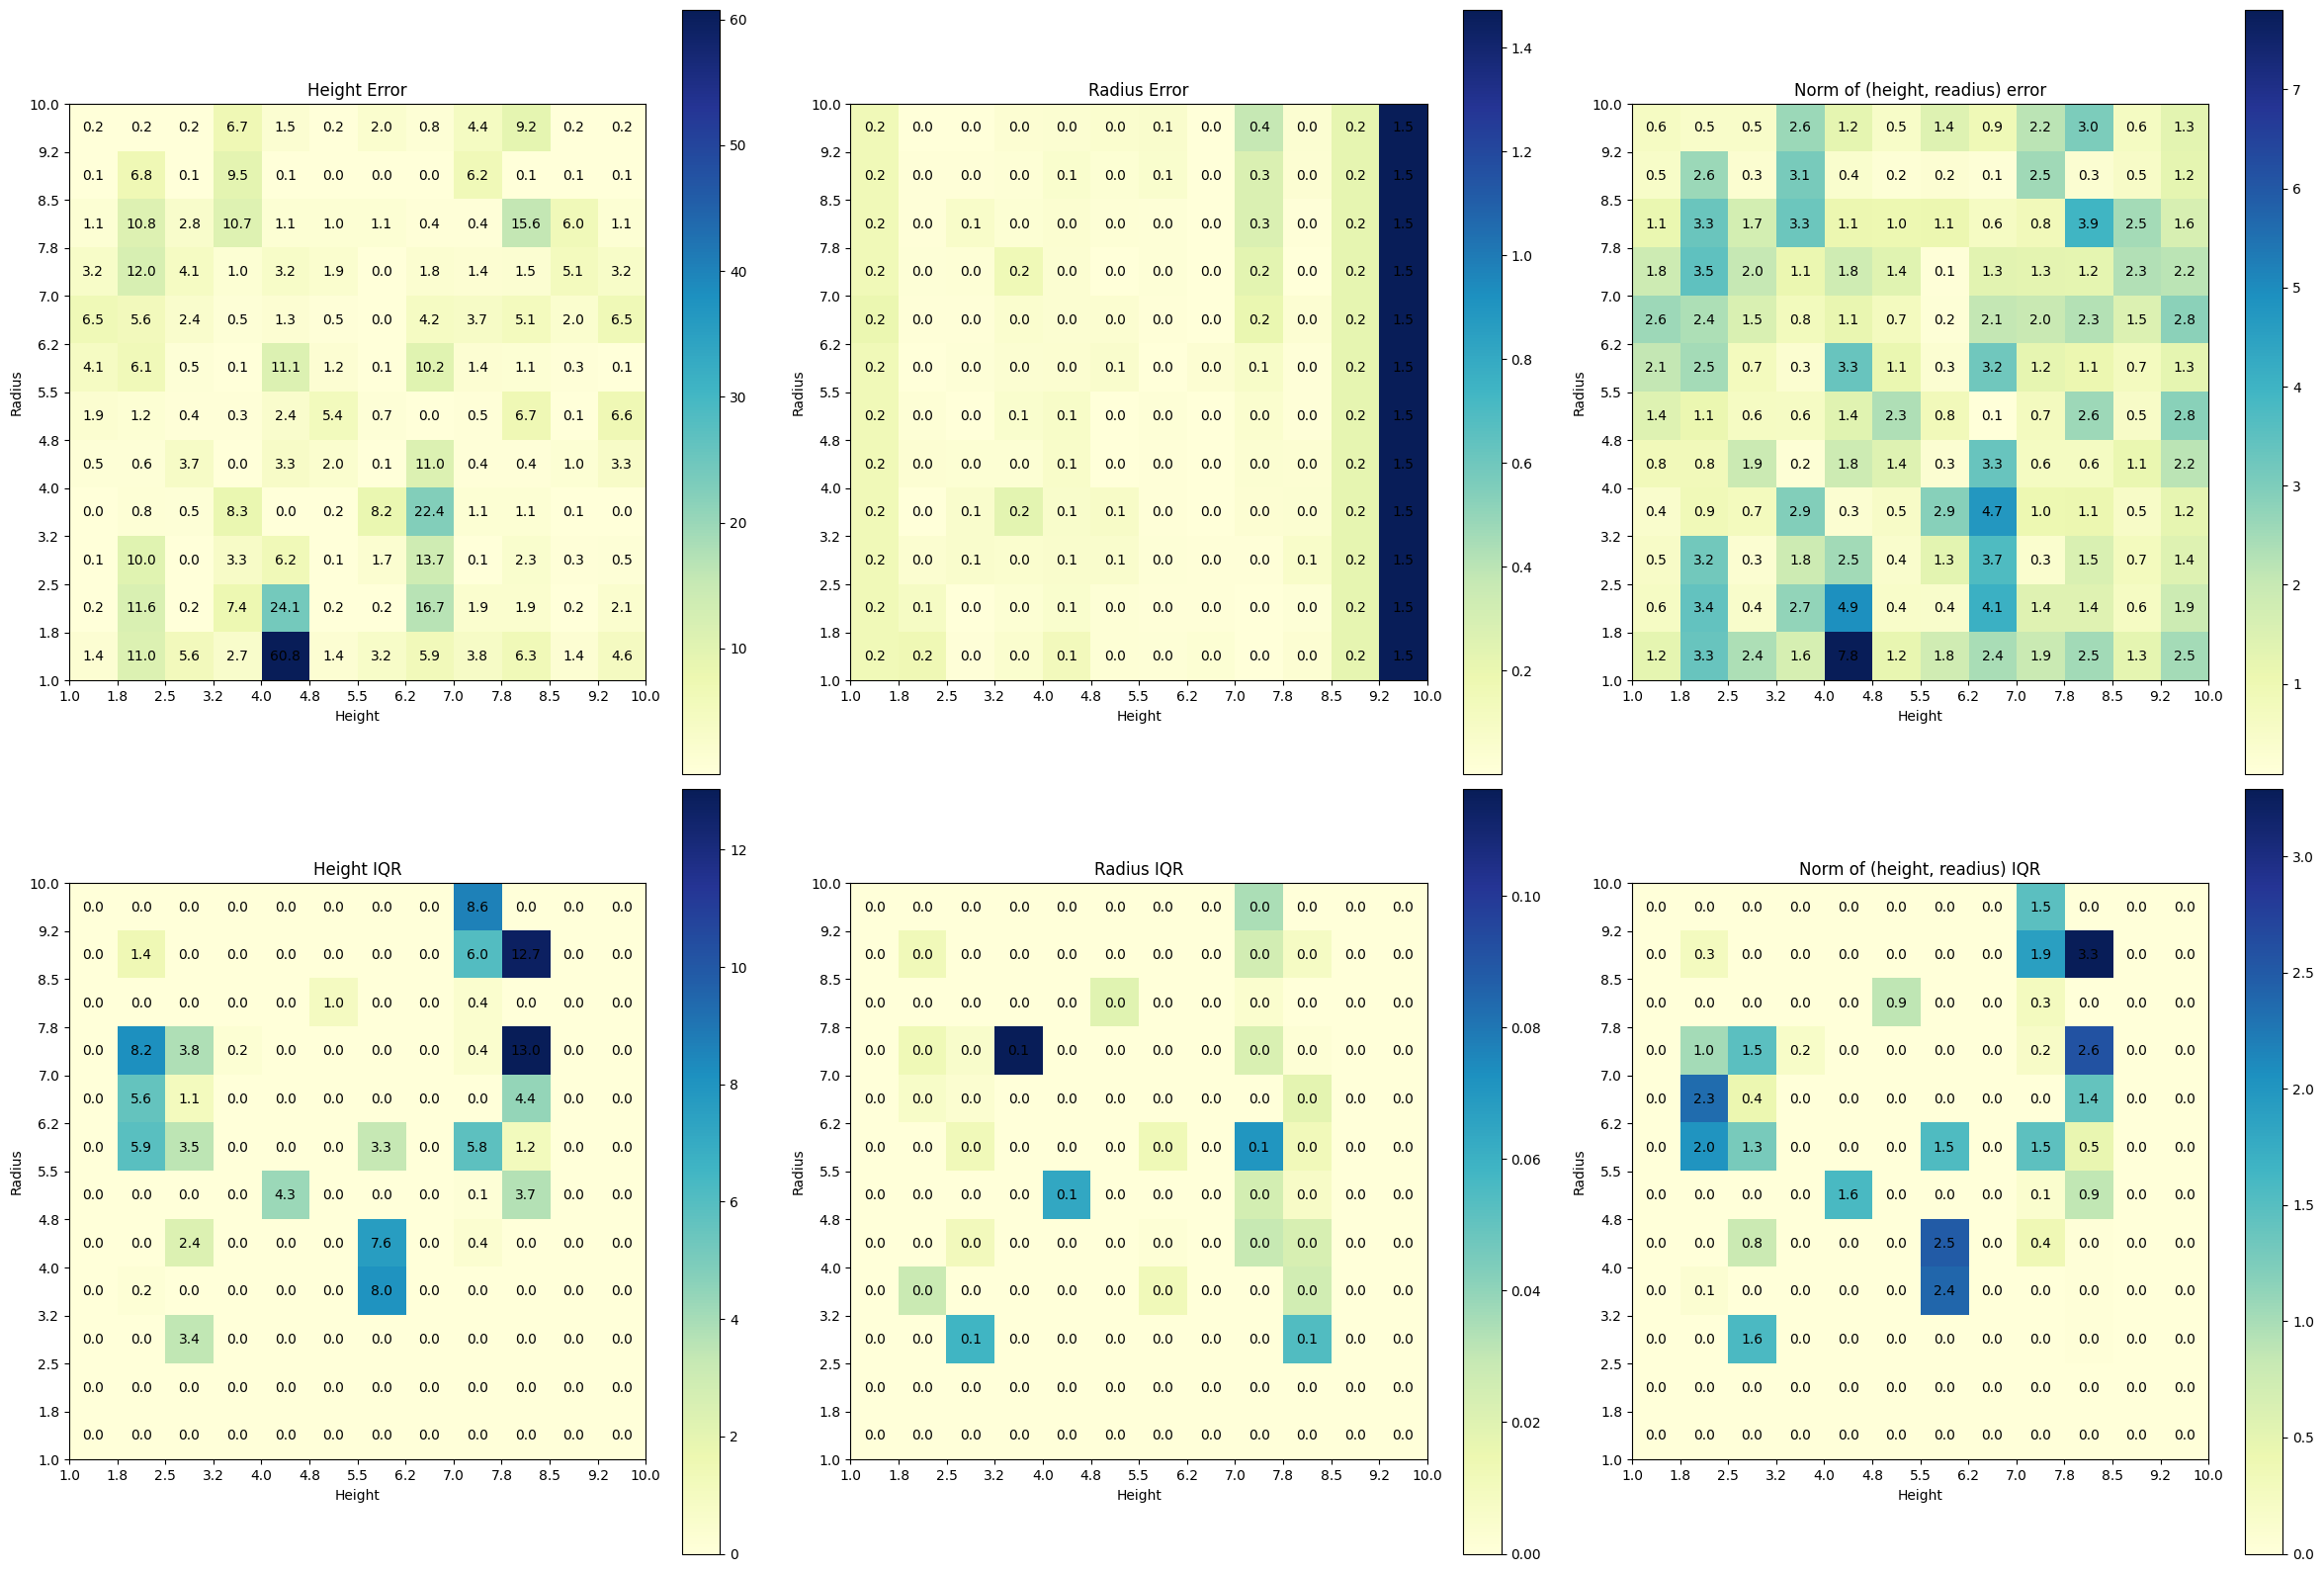